<a href="https://colab.research.google.com/github/smirnov-qa/test-cases/blob/main/USA_Sales_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Загрузим файл с данными о месячных розничных продажах в США за один день

Данные были скорректированы с учетом инфляции

Данные будут использованы для прогнозирования на следующие 2 года

In [1]:
# Выполним очистку всех переменных в рабочей области
rm(list=ls())

In [9]:
# Загрузим пакет fpp2 для прогнозирования
install.packages("fpp2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’, ‘expsmooth’, ‘fma’, ‘forecast’




In [12]:
# Загрузим пакет ggplot2
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
# Загрузим данные для прогнозирования
data <- read.csv("/content/real_sales_per_day.csv")

In [5]:
# Объявим файл как данные временного ряда
Y <- ts(data[,2], start = c(1992,1), frequency = 12)

Предварительный анализ

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

── Attaching packages ────────────────────────────────────────────── fpp2 2.5 ──

✔ forecast  8.21.1     ✔ expsmooth 2.3   
✔ fma       2.5        





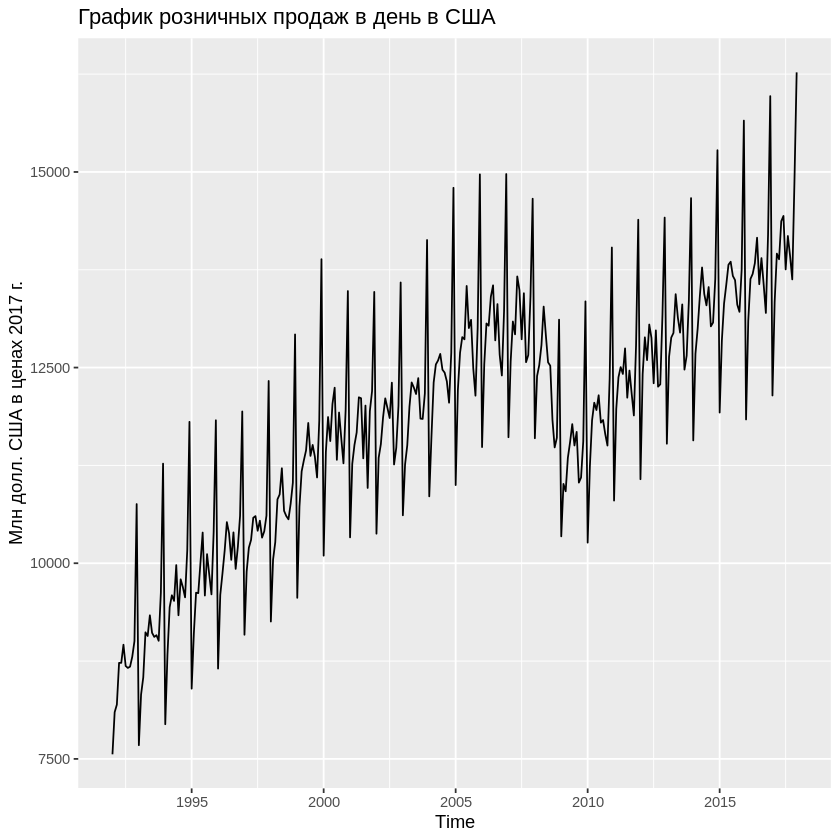

In [17]:
library(ggplot2)
library(fpp2)

# Построение графика розничных продаж
autoplot(Y) + ggtitle("График розничных продаж в день в США") + ylab("Млн долл. США в ценах 2017 г.")

In [18]:
# Исследуем изменения
# Возьмем первую разницу в данных, чтобы устранить тренд
DY <- diff(Y)

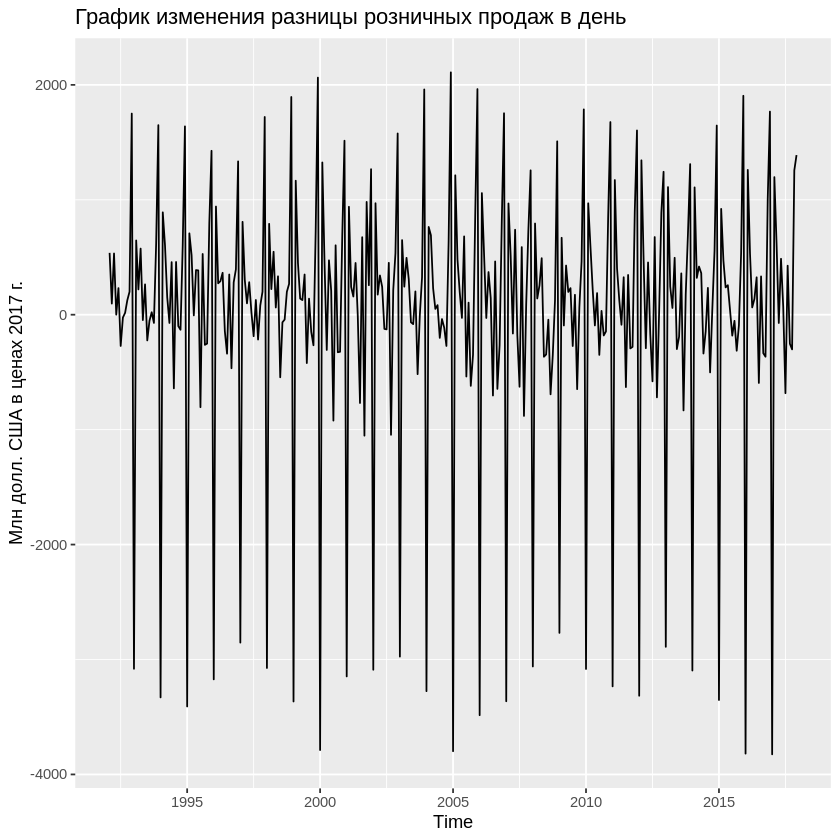

In [19]:
# Построение графика разности розничных продаж во времени
autoplot(DY) +
  ggtitle("График изменения разницы розничных продаж в день") +
  ylab("Млн долл. США в ценах 2017 г.")

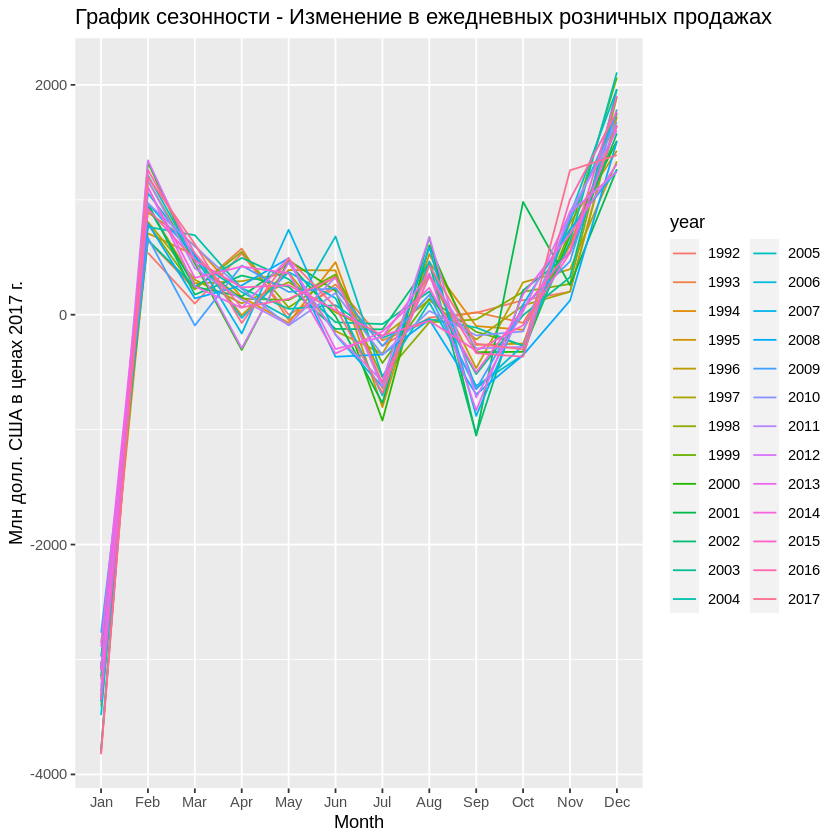

In [20]:
# Когда ряд стал тренд-стационарным, проверим сезонность в данных
ggseasonplot(DY) +
  ggtitle("График сезонности - Изменение в ежедневных розничных продажах") +
  ylab("Млн долл. США в ценах 2017 г.")

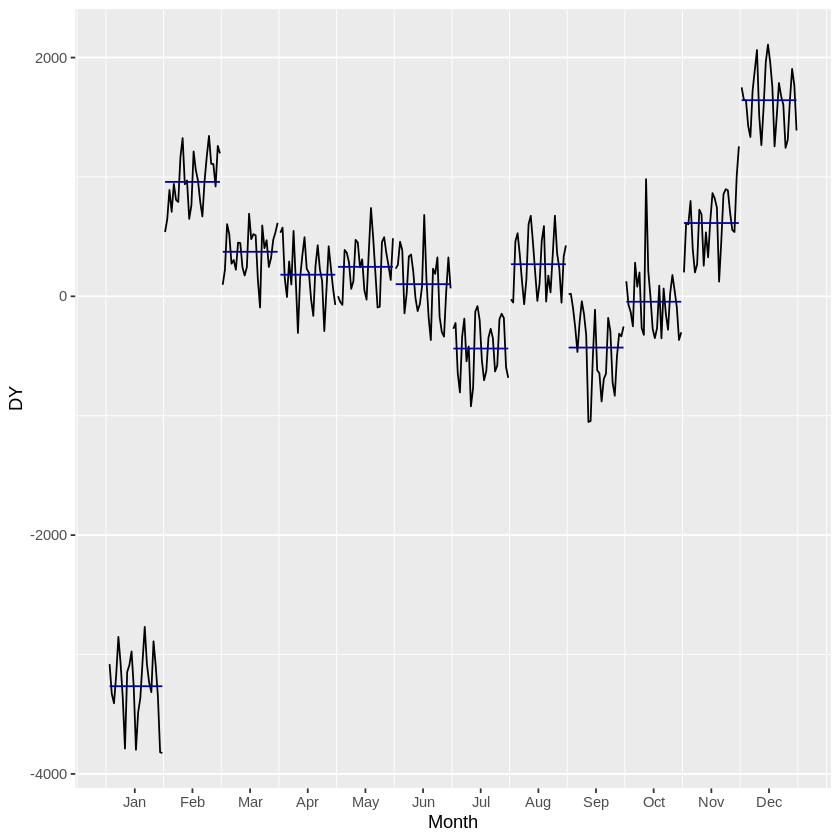

In [21]:
# Второй график сезонности
ggsubseriesplot(DY)

Проведем прогнозирование различными методами



Forecast method: Seasonal naive method

Model Information:
Call: snaive(y = DY) 

Residual sd: 286.5849 

Error measures:
                    ME     RMSE      MAE      MPE     MAPE MASE       ACF1
Training set 0.6259018 286.5849 230.0816 58.83638 129.3811    1 -0.4498537

Forecasts:
         Point Forecast       Lo 80       Hi 80       Lo 95      Hi 95
Jan 2018    -3824.98954 -4192.26291 -3457.71617 -4386.68568 -3263.2934
Feb 2018     1197.21985   829.94648  1564.49322   635.52371  1758.9160
Mar 2018      615.41387   248.14050   982.68724    53.71773  1177.1100
Apr 2018      -71.88096  -439.15433   295.39241  -633.57710   489.8152
May 2018      486.47393   119.20056   853.74730   -75.22221  1048.1701
Jun 2018       66.77573  -300.49764   434.04910  -494.92041   628.4719
Jul 2018     -682.72384 -1049.99721  -315.45047 -1244.41998  -121.0277
Aug 2018      426.47485    59.20148   793.74822  -135.22129   988.1710
Sep 2018     -252.57478  -619.84815   114.69859  -814.27092   309.1214
Oct 2

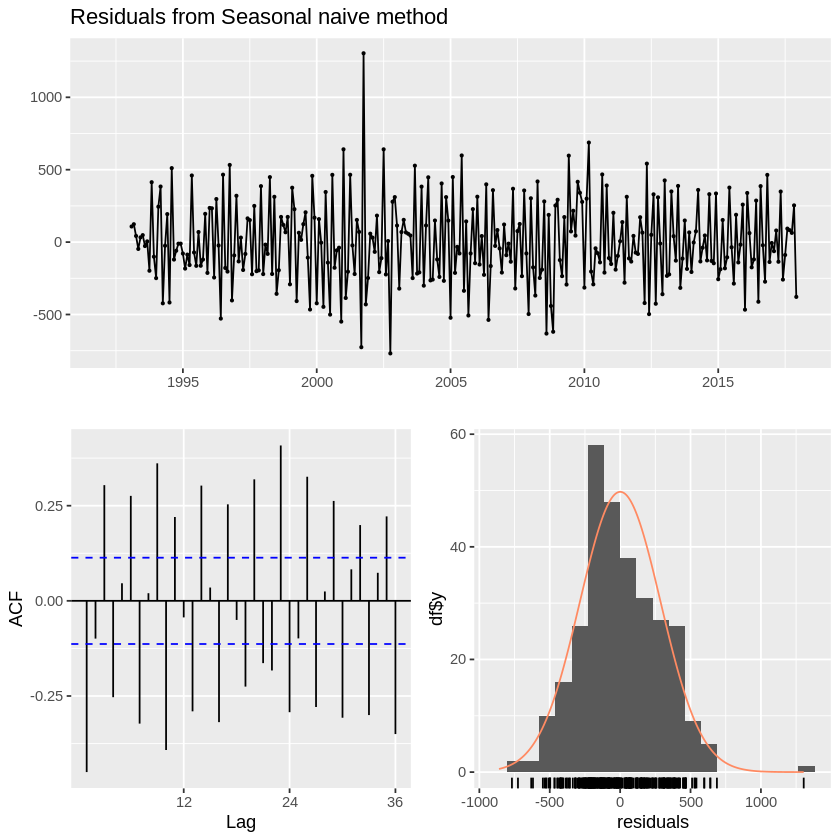

In [22]:
# 1. Сезонный наивный метод
# y_t = y_{t-s} + e_t
fit <- snaive(DY) # Residual sd: 286.5849
print(summary(fit))
checkresiduals(fit)

ETS(A,Ad,A) 

Call:
 ets(y = Y) 

  Smoothing parameters:
    alpha = 0.3432 
    beta  = 0.049 
    gamma = 1e-04 
    phi   = 0.9272 

  Initial states:
    l = 8500.2011 
    b = 44.9313 
    s = 1840.386 204.8422 -367.136 -309.8499 142.3849 -103.6584
           345.2443 268.8423 30.2628 -120.758 -485.2079 -1445.353

  sigma:  218.8133

     AIC     AICc      BIC 
5172.585 5174.919 5239.959 

Training set error measures:
                   ME     RMSE     MAE       MPE     MAPE      MASE        ACF1
Training set 19.42164 212.7686 169.611 0.1533163 1.471308 0.4569217 -0.04666676

	Ljung-Box test

data:  Residuals from ETS(A,Ad,A)
Q* = 341.43, df = 24, p-value < 2.2e-16

Model df: 0.   Total lags used: 24



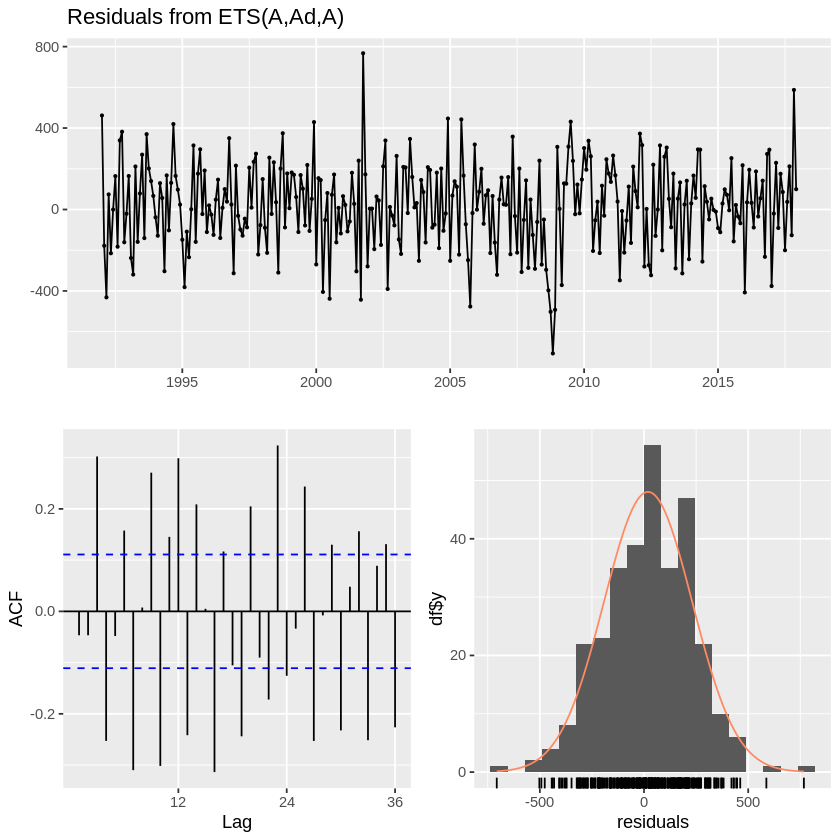

In [23]:
# 2. Модель экспоненциального сглаживания
fit_ets <- ets(Y) # Residual sd: 218.8
print(summary(fit_ets))
checkresiduals(fit_ets)


 ARIMA(0,1,0)(0,1,0)[12]                    : 4234.044
 ARIMA(0,1,0)(0,1,1)[12]                    : 4206.784
 ARIMA(0,1,0)(0,1,2)[12]                    : Inf
 ARIMA(0,1,0)(1,1,0)[12]                    : 4235.509
 ARIMA(0,1,0)(1,1,1)[12]                    : Inf
 ARIMA(0,1,0)(1,1,2)[12]                    : Inf
 ARIMA(0,1,0)(2,1,0)[12]                    : 4209.16
 ARIMA(0,1,0)(2,1,1)[12]                    : 4115.185
 ARIMA(0,1,0)(2,1,2)[12]                    : 4089.378
 ARIMA(0,1,1)(0,1,0)[12]                    : 4143.512
 ARIMA(0,1,1)(0,1,1)[12]                    : 4104.258
 ARIMA(0,1,1)(0,1,2)[12]                    : Inf
 ARIMA(0,1,1)(1,1,0)[12]                    : 4140.117
 ARIMA(0,1,1)(1,1,1)[12]                    : Inf
 ARIMA(0,1,1)(1,1,2)[12]                    : Inf
 ARIMA(0,1,1)(2,1,0)[12]                    : 4118.975
 ARIMA(0,1,1)(2,1,1)[12]                    : 4048.264
 ARIMA(0,1,1)(2,1,2)[12]                    : 4034.182
 ARIMA(0,1,2)(0,1,0)[12]                

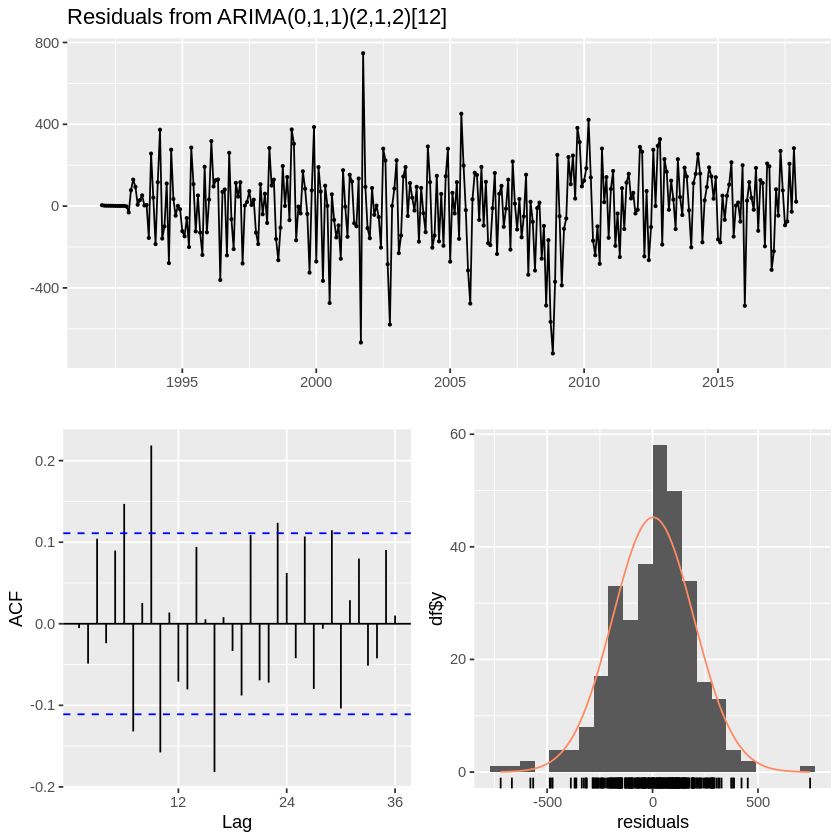

In [24]:
# 3. ARIMA
fit_arima <- auto.arima(Y, d=1, D=1, stepwise = FALSE, approximation = FALSE, trace = TRUE) # Residual sd: 197,8
print(summary(fit_arima))
checkresiduals(fit_arima)


Forecast method: ARIMA(0,1,1)(2,1,2)[12]

Model Information:
Series: Y 
ARIMA(0,1,1)(2,1,2)[12] 

Coefficients:
          ma1    sar1     sar2     sma1    sma2
      -0.4758  0.7712  -0.6064  -1.2262  0.4865
s.e.   0.0492  0.0749   0.0753   0.0790  0.0875

sigma^2 = 39129:  log likelihood = -2010.95
AIC=4033.89   AICc=4034.18   BIC=4056.1

Error measures:
                   ME     RMSE      MAE         MPE     MAPE      MASE
Training set 3.049428 192.0197 146.7168 0.008578404 1.247377 0.3952462
                     ACF1
Training set -0.005302253

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2018       12927.67 12674.16 13181.17 12539.96 13315.37
Feb 2018       14085.40 13799.17 14371.62 13647.66 14523.14
Mar 2018       14546.20 14230.63 14861.76 14063.58 15028.82
Apr 2018       14572.81 14230.40 14915.21 14049.15 15096.47
May 2018       15024.70 14657.42 15391.99 14462.99 15586.42
Jun 2018       14876.39 14485.80 15266.98 14279.04 15473.74
Jul 2018       

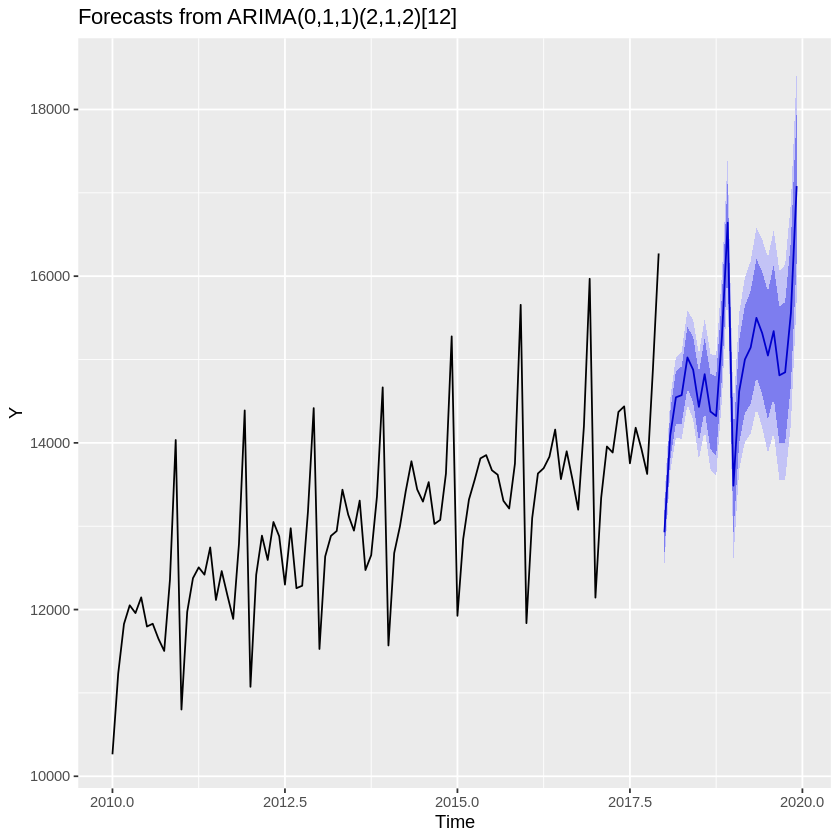

In [25]:
# Прогнозирование с помощью ARIMA
fcst <- forecast(fit_arima, h=24)
autoplot(fcst, include = 96)
print(summary(fcst))